In [1]:
using DifferentialEquations
using PyPlot
using RMS

In [2]:
phaseDict = readinput("../src/testing/superminimal.yml") #load mechanism dictionary

Dict{Any,Any} with 1 entry:
  "gas" => Dict{Any,Any}("Species"=>Species[Species{NASA{EmptyThermoUncertainty…

In [3]:
spcs = phaseDict["gas"]["Species"]; #mechanism dictionaries index:  phaseDict[phasename]["Species" or "Reactions"]
rxns = phaseDict["gas"]["Reactions"];

In [4]:
ig = IdealGas(spcs,rxns,name="gas"); #Define the phase (how species thermodynamic and kinetic properties calculated)
initialconds = Dict(["T"=>1000.0,"P"=>10.0e5,"H2"=>0.67,"O2"=>0.33]); #Set simulation Initial Temp and Pressure
domain,y0 = ConstantVDomain(phase=ig,initialconds=initialconds); #Define the domain (encodes how system thermodynamic properties calculated)

In [5]:
react = Reactor(domain,y0,(0.0,0.101)); #Create the reactor object

In [6]:
sol = solve(react.ode,CVODE_BDF(),abstol=1e-20,reltol=1e-12); #solve the ode associated with the reactor

In [13]:
bsol = Simulation(sol,domain);

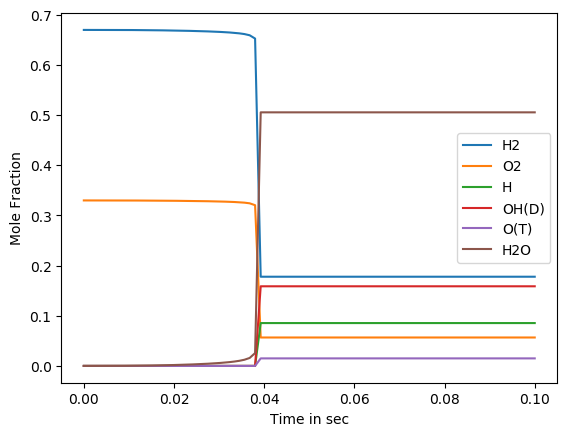

PyObject <matplotlib.text.Text object at 0x1761ce750>

In [14]:
plotmolefractions(bsol,0.1; t0=1e-15, N=1000, tol=0.01)

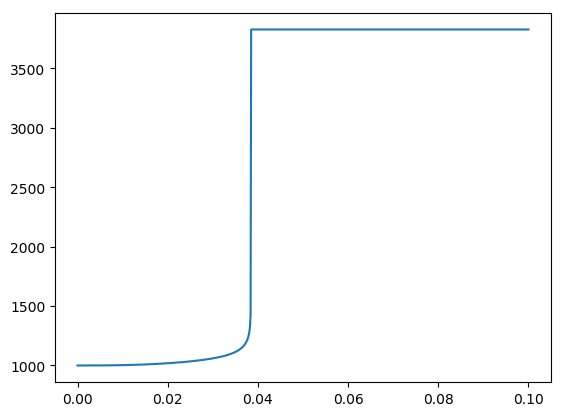

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x176aa2dd0>

In [15]:
plot(ts,[sol(t)[end] for t in ts]) #Temperature vs time

In [10]:
ts[argmax(diff([sol(t)[end] for t in ts]))] #Ignition Delay Time in seconds

0.038384723436228105